In [49]:
#importing library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Problem Statement

A retail store that has multiple outlets across the country are facing issues in managing the inventory - to match the demand with respect to supply. You are a data scientist, who has to come up with useful insights using the data and make prediction models to forecast the sales for X number of months/years.

<Axes: xlabel='Date'>

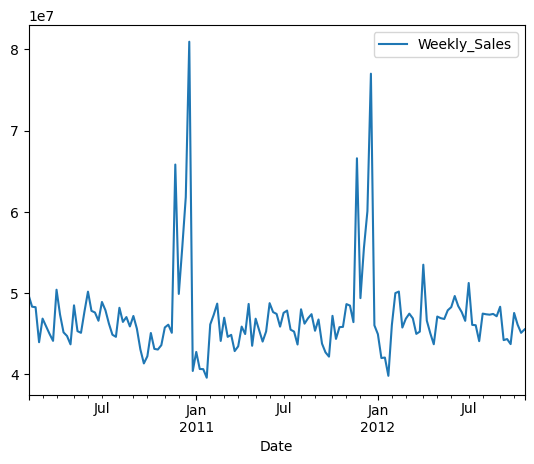

In [50]:
#reading the Walmart.csv file
df = pd.read_csv('Walmart.csv')
df['Date'] = pd.to_datetime(df['Date'], dayfirst = True)
df.groupby('Date')[['Weekly_Sales']].sum().sort_values(by='Date', ascending=True).plot()

# Project Objective

The objective of this project is to help my manager get forecasting insights of weekly sales onwards 2013-01 to at least 3 months, because the company want to sale unsold product in the start of the year. They have underutilized or undersold items that they want to push to shelves and sell it as soon as possible and they need forecast so that production team can cut down the production based on customer traffic.

# Data Description

In [51]:
df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

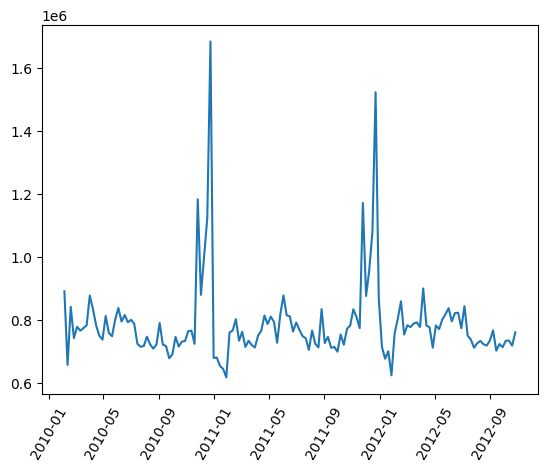

In [52]:
#This function returns the dataframe of each store and their weekly sales and dates, it takes storeno as input argument.
def storenumber(StoreNo):
    groupedbystore = df.groupby(['Store', 'Date'])['Weekly_Sales'].sum().reset_index()
    store1 = groupedbystore[groupedbystore['Store']==StoreNo].drop(columns = ['Store'])
    plt.plot(store1['Date'], store1['Weekly_Sales'])
    plt.xticks(rotation=60)
    
storenumber(45)

You are provided with the weekly sales data for their various outlets. Use statistical
analysis, EDA, outlier analysis, and handle the missing values to come up with various
insights that can give them a clear perspective on the following:

In [53]:
#a. If the weekly sales are affected by the unemployment rate, if yes - which stores are suffering the most?
#Weekly_Sales has -0.106176 correlation with Unemployment.
grouped = df.groupby('Store')['Unemployment'].mean().reset_index()
minvalue = grouped.min()[1]
grouped[grouped['Unemployment'] == minvalue]
#As you can store 23 and store 40 is the most suffering stores weekly sales affected by unemployment rate.

,Store,Unemployment
22,23,4.796014
39,40,4.796014


<Axes: >

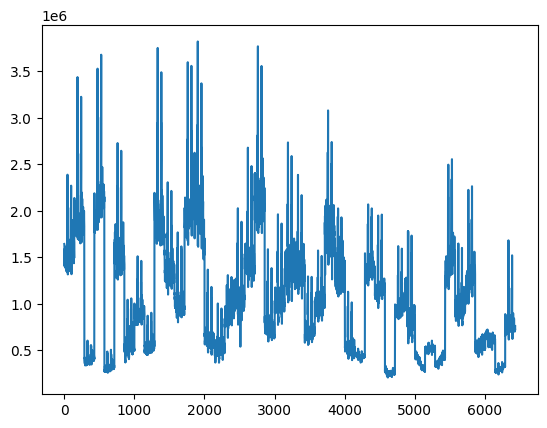

In [54]:
#b. If the weekly sales show a seasonal trend, when and what could be the reason?
df['Weekly_Sales'].plot() 
#Since the weekly_sales showing downward seasonal trend, it can mean there is a population shift or it might be a competititor 
#effect.

In [37]:
#c. Does temperature affect the weekly sales in any manner?
df.corr(numeric_only=True)
#As you can see temperature has weak negative correlation, there is no correlation we can conclude 
#this, it means temperature has no effect on the weekly sales in any manner

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Store,1.000000e+00,-0.335332,-4.386841e-16,-0.022659,0.060023,-0.209492,0.223531
Weekly_Sales,-3.353320e-01,1.000000,3.689097e-02,-0.063810,0.009464,-0.072634,-0.106176
Holiday_Flag,-4.386841e-16,0.036891,1.000000e+00,-0.155091,-0.078347,-0.002162,0.010960
Temperature,-2.265908e-02,-0.063810,-1.550913e-01,1.000000,0.144982,0.176888,0.101158
Fuel_Price,6.002295e-02,0.009464,-7.834652e-02,0.144982,1.000000,-0.170642,-0.034684
CPI,-2.094919e-01,-0.072634,-2.162091e-03,0.176888,-0.170642,1.000000,-0.302020
Unemployment,2.235313e-01,-0.106176,1.096028e-02,0.101158,-0.034684,-0.302020,1.000000


In [38]:
#d. How is the Consumer Price index affecting the weekly sales of various stores?
df.corr(numeric_only=True)
#As you can see Consumer Price Index has no affect on the weekly sales of various stores. The correlation is -0.072634 
#it means CPI is not affecting the weekly sales of various stores.

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Store,1.000000e+00,-0.335332,-4.386841e-16,-0.022659,0.060023,-0.209492,0.223531
Weekly_Sales,-3.353320e-01,1.000000,3.689097e-02,-0.063810,0.009464,-0.072634,-0.106176
Holiday_Flag,-4.386841e-16,0.036891,1.000000e+00,-0.155091,-0.078347,-0.002162,0.010960
Temperature,-2.265908e-02,-0.063810,-1.550913e-01,1.000000,0.144982,0.176888,0.101158
Fuel_Price,6.002295e-02,0.009464,-7.834652e-02,0.144982,1.000000,-0.170642,-0.034684
CPI,-2.094919e-01,-0.072634,-2.162091e-03,0.176888,-0.170642,1.000000,-0.302020
Unemployment,2.235313e-01,-0.106176,1.096028e-02,0.101158,-0.034684,-0.302020,1.000000


In [39]:
#e. Top performing stores according to the historical data.
grouped = df.groupby('Store')[['Store','Weekly_Sales']].sum()
a = maxvalue.max()
a = a.values[1]
ab = grouped.eq(301397792.46)
ab[ab['Weekly_Sales']==True]
print(grouped.loc[20:20])
#Store No. 20 is the top performing store according to the historical data.

NameError: name 'maxvalue' is not defined

In [40]:
#f. The worst performing store, and how significant is the difference between the highest and 
#lowest performing stores.
grouped = df.groupby('Store')[['Store','Weekly_Sales']].sum()
a = grouped.max()
a = a.values[1]
ab = grouped.eq(301397792.46)
ab[ab['Weekly_Sales']==True]
print(grouped.loc[20:20])
print(grouped.min()[0])
#Store 20 is the highest performing store
#Store 143 is the lowest performing store

       Store  Weekly_Sales
Store                     
20      2860  3.013978e+08
143.0


In [41]:
df.duplicated().sum()

0

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


In [43]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Store,6435.0,2.300000e+01,12.988182,1.000,12.000,23.000000,3.400000e+01,4.500000e+01
Weekly_Sales,6435.0,1.046965e+06,564366.622054,209986.250,553350.105,960746.040000,1.420159e+06,3.818686e+06
Holiday_Flag,6435.0,6.993007e-02,0.255049,0.000,0.000,0.000000,0.000000e+00,1.000000e+00
Temperature,6435.0,6.066378e+01,18.444933,-2.060,47.460,62.670000,7.494000e+01,1.001400e+02
Fuel_Price,6435.0,3.358607e+00,0.459020,2.472,2.933,3.445000,3.735000e+00,4.468000e+00
CPI,6435.0,1.715784e+02,39.356712,126.064,131.735,182.616521,2.127433e+02,2.272328e+02
Unemployment,6435.0,7.999151e+00,1.875885,3.879,6.891,7.874000,8.622000e+00,1.431300e+01


In [44]:
df.shape

(6435, 8)

<Axes: ylabel='Weekly_Sales'>

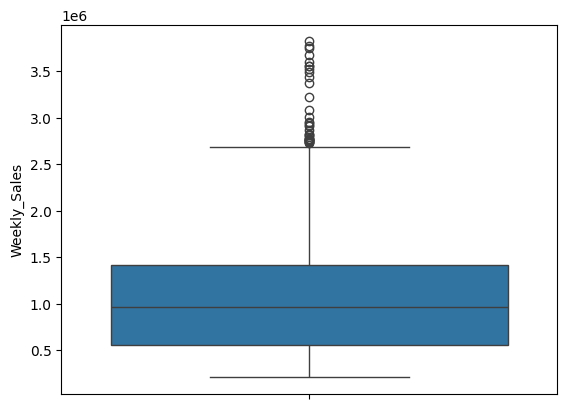

In [45]:
sns.boxplot(df['Weekly_Sales'])

# Data Preprocessing Steps And Inspiration &  Choosing The Alogrithm For The Project

13:33:43 - cmdstanpy - INFO - Chain [1] start processing
13:33:43 - cmdstanpy - INFO - Chain [1] done processing


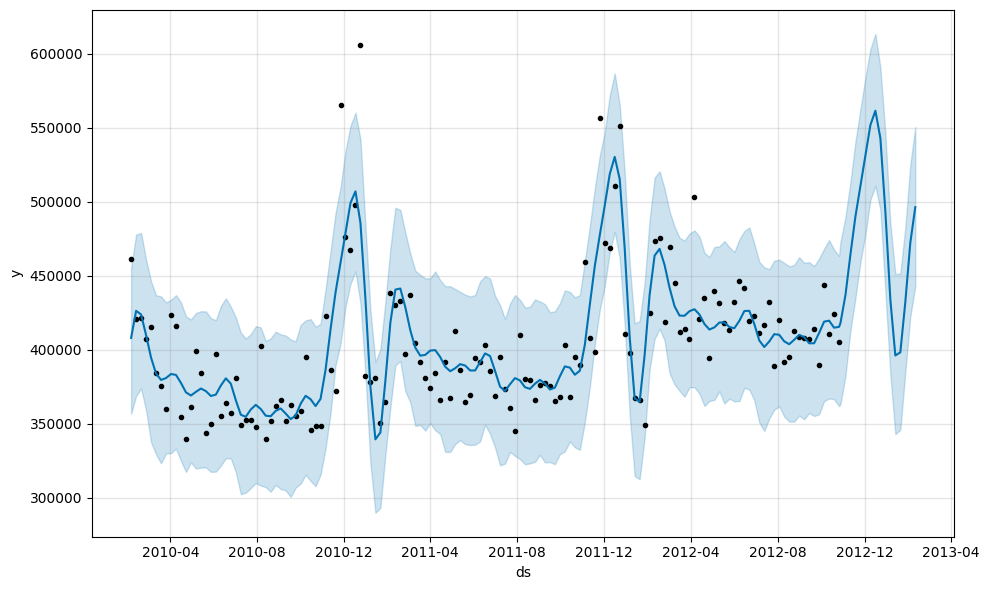

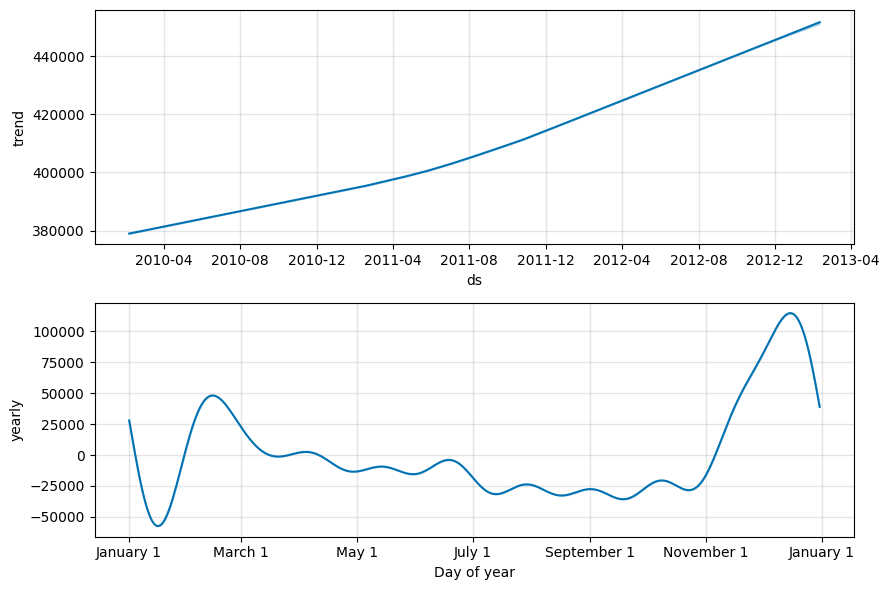

In [57]:
def timeseries(StoreNo):
    groupedbystore = df.groupby(['Store', 'Date'])['Weekly_Sales'].sum().reset_index()
    store1 = groupedbystore[groupedbystore['Store']==StoreNo].drop(columns = ['Store'])
    store1.columns = ['ds', 'y']
    model = Prophet(interval_width=0.95)
    model.fit(store1)
    future_dates = model.make_future_dataframe(periods=16, freq='W')
    forecast = model.predict(future_dates)
    sales_forecast = model.plot(forecast)
    model.plot_components(forecast)
timeseries(3) #We can check the time series forecasting for 4 months for any function call, the function can take from 1 to 
#upto 43. The input argument takes storeno and returns the time series forecasting and their componenets